# Proyek Analisis Data: E-Commers Public Dataset
- **Nama:** Yonathan
- **Email:** yonathans1603@gmail.com
- **ID Dicoding:** yonathan_16

## Menentukan Pertanyaan Bisnis

- Revenue barang yang paling banyak dibeli per bulan?
- Kategori barang dengan tingkat pembelian yang tinggi?

## Import Semua Packages/Library yang Digunakan

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [225]:
import csv
customer_df = pd.read_csv('/content/drive/MyDrive/Dataset/customers_dataset.csv')
customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [226]:
product_df = pd.read_csv('/content/drive/MyDrive/Dataset/products_dataset.csv')
product_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [227]:
seller_df = pd.read_csv('/content/drive/MyDrive/Dataset/sellers_dataset.csv')
seller_df.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [228]:
order_df = pd.read_csv('/content/drive/MyDrive/Dataset/orders_dataset.csv')
order_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [229]:
payment_df = pd.read_csv('/content/drive/MyDrive/Dataset/order_payments_dataset.csv')
payment_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [230]:
items_df = pd.read_csv('/content/drive/MyDrive/Dataset/order_items_dataset.csv')
items_df.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [231]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Dataset/order_reviews_dataset.csv')
reviews_df.head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


### Assessing Data

In [232]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [233]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [234]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [235]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [236]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [237]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [238]:
customer_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [239]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [240]:
print("Jumlah duplikasi ", product_df.duplicated().sum())

Jumlah duplikasi  0


In [241]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [242]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [243]:
seller_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [244]:
seller_df.duplicated().sum()

0

In [245]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [246]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [247]:
order_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [248]:
order_df.duplicated().sum()

0

In [249]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Cleaning Data

In [250]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [251]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [252]:
product_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [253]:
product_df.fillna(value="Not Listed", inplace=True)

In [254]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [255]:
product_df.head(100)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
95,af16005fca813272caf59c432153949e,moveis_decoracao,55.0,1186.0,2.0,800.0,53.0,8.0,20.0
96,e6a1ff3552ba3305c1cf0a4dde50347f,automotivo,58.0,703.0,6.0,5250.0,47.0,19.0,23.0
97,d8a405c732027a2af3187b031890933d,automotivo,50.0,361.0,1.0,200.0,35.0,4.0,26.0
98,ce94e3c41145e28428cdae952a1fd7f2,relogios_presentes,58.0,899.0,2.0,335.0,17.0,11.0,12.0


##Memperbaiki tipe data

In [256]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [257]:
datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "order_purchase_timestamp"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [258]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)


#eksplore customer_df

In [259]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
83558,4652920f1cba5bd776eb8a737b0b66f5,31dfbc935e91c88c9670960adc969234,95690,rolante,RS
71577,c238a7a6b8fc156a606a9577031bfa43,bd058b8c5379020eb275cdb503088d9e,59066,natal,RN
4005,030004cafb2703766067d48c01a92c86,6152306533a889b0d5b9234324e259cc,93285,esteio,RS
48090,add72faa5e3cf873054bb6ecd9472e4e,bc59f1e430734e331b87a168b63450a0,4046,sao paulo,SP
81546,b2455d365185ab7c1da94e742e4976ad,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG


In [260]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [261]:
customer_df.customer_id.is_unique

True

In [262]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [263]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

#Eksplor product_df

In [264]:
product_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
971,68db47d312d0b87e469762f0481d3b9c,ferramentas_jardim,60.0,681.0,4.0,16900.0,38.0,70.0,38.0
7247,baa1fd3231ef36f7fea009503748eab4,beleza_saude,58.0,418.0,4.0,400.0,15.0,13.0,14.0
10645,513721dadfd93bcbce9da4d3bd67c06d,casa_construcao,63.0,376.0,4.0,700.0,26.0,9.0,24.0
32660,585fba465552491690a4d0ebc78ef585,pet_shop,24.0,796.0,1.0,200.0,16.0,11.0,11.0
18471,ce3524ed518a9e6ad7c72872ed88e461,telefonia,55.0,1311.0,2.0,50.0,18.0,6.0,11.0
2115,8b6ec82b7089cbbb7d187eaa3c74275f,moveis_decoracao,59.0,2084.0,2.0,1350.0,69.0,11.0,11.0
13770,4808d0f726c21019e47863e21427cb48,cool_stuff,53.0,632.0,2.0,4925.0,42.0,37.0,37.0
23968,215d6de5878361301ea712b9d36dee94,brinquedos,59.0,410.0,1.0,1164.0,17.0,22.0,28.0
21891,ce9c3ceb822eff6638b2bf974da84b3b,pet_shop,60.0,688.0,2.0,300.0,20.0,10.0,20.0
7722,12b86b2eab3b8c2bbf01adc381aa96e2,fashion_calcados,44.0,284.0,12.0,400.0,29.0,7.0,16.0


In [265]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,Not Listed,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


#Eksplor order_df

In [266]:
order_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
48983,753901c05b6f62cc4505e75b67628629,db0e8a0fae0cbc202a1593ef422fbd45,delivered,2018-04-12 20:17:16,2018-04-13 13:15:44,2018-04-17 15:22:40,2018-05-09 18:34:51,2018-05-15
53546,b8ee80bb6d575240f0b5f9f87987be6d,d3bc1fd607f5e867e30371619d28a55b,delivered,2018-06-11 20:22:26,2018-06-11 20:40:57,2018-06-13 13:37:00,2018-07-05 15:58:26,2018-06-29
73700,494984e8205ee711abf407b39548f85c,441b8206c35723f88ae1c338f274149d,delivered,2018-02-03 17:42:33,2018-02-03 19:30:28,2018-02-05 17:05:09,2018-02-26 11:23:20,2018-03-13
96670,c7a7200ede6d21b5eac67705000af954,e12bf82749c738ad8e5fb1c11a50ebf6,delivered,2018-07-05 07:50:34,2018-07-05 16:18:00,2018-07-05 08:02:00,2018-07-11 19:06:57,2018-07-27
49215,ddb4aab3495ab19d0fa7dbb5aeb703b9,e81d9cca059dc9b09925555999027489,delivered,2018-01-08 10:05:30,2018-01-09 07:20:10,2018-01-10 19:10:54,2018-01-11 20:49:14,2018-01-26
57011,a97278b621a4dd5b9a74995d6f72abfb,3853318e172a57acf28ce004da061c24,delivered,2017-05-07 17:52:22,2017-05-09 09:35:29,2017-05-09 12:44:25,2017-05-19 13:10:02,2017-06-02
33944,85eaa27aacbad988234b742f85ca7cd3,4f6b63ab9179d2cae7d2b9be48c33271,delivered,2018-05-24 12:41:49,2018-05-24 12:59:30,2018-05-30 14:58:00,2018-06-11 15:17:39,2018-07-11
47564,31ffe8189e41e4bbad1c872b804c6bfd,722014e4b4beb1e103b28f711a906d36,delivered,2017-04-14 19:52:22,2017-04-14 20:05:09,2017-04-17 08:38:59,2017-04-20 20:49:13,2017-05-08
51332,3fadda9b9439e6264745e868c55332ba,f55634234244a7695ebbda7abd098b47,delivered,2018-02-27 16:54:49,2018-02-27 17:40:27,2018-03-06 11:18:21,2018-03-24 21:04:06,2018-03-22
93212,5df11955c9e776e57bf66071651f6db7,28f6ea6858cfdf1b45f4a3623a6955e6,delivered,2017-04-06 10:54:02,2017-04-06 11:05:18,2017-04-06 15:43:05,2017-04-07 16:43:28,2017-04-27


In [267]:
order_df.describe(include="all")

<ipython-input-267-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-267-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-267-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-267-bc0d6a874b43>:1: FutureWarn

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [268]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

In [269]:
order_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
41726,c3fb3cb084af855d673862998039acc0,6400c677eed091d6188649f7a9b0a4f4,delivered,2017-05-31 10:46:45,2017-05-31 10:55:21,2017-06-07 16:15:30,2017-06-09 15:38:29,2017-06-13,2.0
31373,f46b842d9b4dfd29acf5eec998837ede,97fd3f96bfd52233a59ed171a7356cf4,delivered,2018-07-12 22:21:00,2018-07-12 22:35:17,2018-08-02 05:34:00,2018-08-06 17:36:46,2018-08-02,5.0
99279,4cf09d9e5ebbe0f91ddd7bf9aae891cd,07b6b4fe5fefb948fc76b6d2bdba77d8,delivered,2018-07-19 08:37:26,2018-07-21 03:25:17,2018-07-23 15:31:00,2018-08-21 01:12:45,2018-08-10,28.0
39354,2236ffd5989a4b6263176d0359843c83,77d121b2c66bdceaf794af539d3781be,delivered,2017-05-22 23:13:13,2017-05-22 23:30:10,2017-05-24 14:05:07,2017-05-31 05:36:03,2017-06-21,7.0
9645,92c3b57fce4cf8057ae90e02accd7fd4,7c9bc8d79415d32a5cba4114cbe607c0,delivered,2018-01-20 09:38:35,2018-01-20 09:54:21,2018-01-22 14:25:01,2018-01-29 22:10:31,2018-02-15,7.0
40974,02d5935847b855f189ad0391968773b2,5a01d03e70311e54445e9dc460e35c7a,delivered,2017-10-13 12:32:41,2017-10-13 12:49:09,2017-10-17 17:04:43,2017-10-30 12:52:27,2017-11-07,13.0
66966,788520bd4eaa054450b168f6318f26e6,752075b7c55918f527dda8a124d8691d,delivered,2017-11-23 20:21:12,2017-11-23 20:31:28,2017-11-29 21:28:10,2017-12-08 17:22:50,2017-12-21,9.0
62001,724851759f03251eb3a9e209916f07db,17d32607b69ff5f17724566ff49aa9fd,delivered,2017-07-21 12:05:51,2017-07-21 12:23:05,2017-07-21 17:22:28,2017-08-04 17:42:37,2017-08-14,14.0
33943,ddebbbff46c170583ad0c76fcf152e99,6432b1823d5690f3a703b14533b9c6c7,delivered,2018-01-25 22:06:25,2018-01-25 22:18:03,2018-01-26 22:42:49,2018-02-01 23:29:04,2018-02-19,6.0
79827,6de01bde7c77294473059b82b205b7ae,865c0d2c9e29497de146c1744ae25068,delivered,2018-01-22 13:04:52,2018-01-23 03:52:54,2018-01-23 15:57:09,2018-02-02 17:28:49,2018-02-21,10.0


<Axes: >

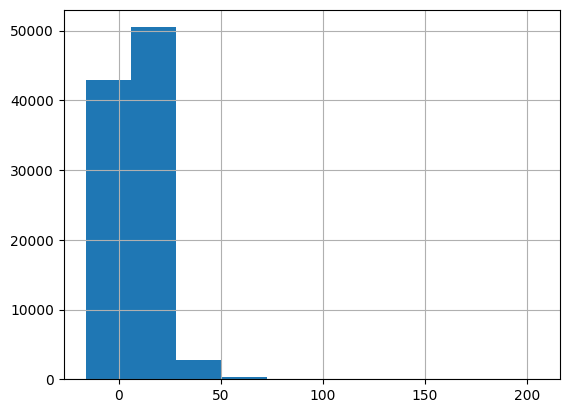

In [270]:
order_df.delivery_time.hist()

##Eksplor Seller_df

In [271]:
seller_df.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1060,cb5df0dcb9e280b1780e9d589889f2c7,15115,bady bassitt,SP
1617,7b7f91e98f8c6def45a1407923304402,6154,osasco,SP
962,dd8a29ce82d5c705ba932d81494600a5,8220,sao paulo,SP
2484,3078096983cf766a32a06257648502d1,13720,scao jose do rio pardo,SP
2396,cad10cc982ab6a391570c211b995c17c,18701,avare,SP
999,3092c0b297aacfb4bb6e056ebe13b9b8,7402,aruja,SP
1895,63a79f5a7eb5cb48a7e5787b141c7993,38701,patos de minas,MG
1411,b19f3ca2ea475913750f25a5c37c8d8f,35501,divinopolis,MG
551,723a46b89fd5c3ed78ccdf039e33ac63,93310,"novo hamburgo, rio grande do sul, brasil",RS
2569,538caafddff204241cecbf3a02e6b3cf,4516,sao paulo,SP


In [272]:
seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


##Eksplor items_df

In [273]:
items_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
108788,f7395c7c8462ede2d52c7005b11a8f04,1,de305190ccd7a8cc302a6ee42eb059a1,8648b1e89e9b349e32d3741b30ec737e,2018-04-17 09:29:26,39.50,7.87
23062,34ae480fe2cec3fa921d33b72b32572a,2,e932008cf0ea7c93a077dd8d7e5f49eb,fcdd820084f17e9982427971e4e9d47f,2018-08-21 02:50:04,190.00,17.66
44880,6611608e934a8edf2e2b60c424a3768a,1,de1eee6c50298db6028af08bd88a702a,994f04b3718c2bab35c2adfa8afecd2a,2017-11-30 18:16:26,49.90,9.34
4093,092dd56170a9fa63acf80b11ef09f095,1,67434db9e83b58ef317f4a902807b82e,788f22bafdd7ab0e1e79f19db72f16a4,2018-08-27 22:10:17,55.90,7.65
54524,7bec02a0496ca4c5e9e842cf8c044eba,1,0c8b321d3fd08377fe038cc6257d64e9,e9c6969d40e6a3d2d0f90013165c2b98,2018-01-09 04:29:36,142.99,16.76
83912,be9b657bc6db0ce7ee053472ae3e3fb6,1,6f3b5b605d91b7439c5e3f5a8dffeea7,7d13fca15225358621be4086e1eb0964,2018-08-17 19:55:13,155.00,13.75
12284,1bda6a57a0819d9483894ff53a9fb742,1,c92f0e7b9d49a9543558d6532772441b,5dceca129747e92ff8ef7a997dc4f8ca,2017-10-25 02:56:58,147.90,37.13
91576,cfc95248d9cdb0c56ad45f75b7fd1bde,1,0c859e9bb0591751e168d476ab0bb6e1,ce7d1888639e6fb06b2749cbfdac1ff7,2018-04-05 17:15:20,120.00,81.93
98041,de65887c84d470bbd06abf600e7c7a62,1,027cdd14a677a5834bc67a9789db5021,620c87c171fb2a6dd6e8bb4dec959fc6,2017-03-06 19:19:26,99.90,11.31
26453,3c33046864727b932e3c4087844f091c,1,b095c6b329584cdf2a7e0986de9f3898,a23266650e7c84bb93fbbba502137478,2018-01-05 18:47:40,63.90,15.20


In [274]:
items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


<Axes: >

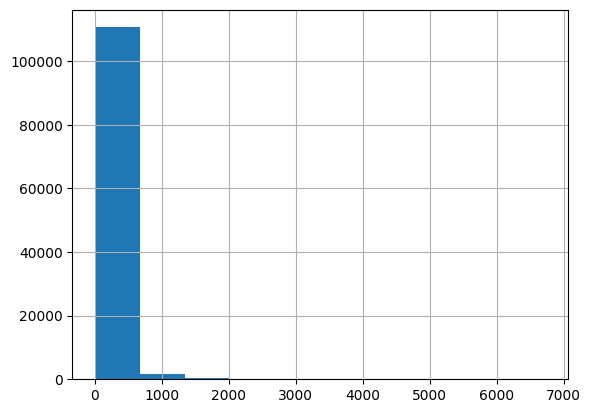

In [275]:
items_df.price.hist()

##Eksplor reviews_df

In [276]:
reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
96379,365163f657bf7d7f2e773de8fa8a4590,6ac4c573549ec4d968907f982c4be7a5,5,NaN,NaN,2018-04-12 00:00:00,2018-04-13 14:56:10
62974,1385c7971352860b1d1cc72bd782bee9,89cee0900747ef772957e602a0e4427c,5,NaN,NaN,2017-07-11 00:00:00,2017-07-13 11:17:48
91013,409b8f62052ebd9428ecb76aa37efda7,810f2be64366fc23aa96accfc596ce3a,5,NaN,NaN,2018-03-27 00:00:00,2018-03-28 02:02:32
48310,b0941fe255e0add847ca05c6a035df41,5e7254b606481fc2af9d54c0e86f8995,5,NaN,Produto foi entregue no dia 03.03. e estarei t...,2017-03-03 00:00:00,2017-03-04 19:05:32
98428,6e4db7dd181e4a4b01e2c069c2aab8cc,9490f95bd06a2f4597126939a670b02e,5,Compras On Line,recebi o produto com sucesso.,2018-08-25 00:00:00,2018-08-27 13:24:20
60669,3445b48b64a244efeb3bc52a912ba320,9340ec2a1f243ae60a2b70696db3b202,5,NaN,NaN,2018-07-06 00:00:00,2018-07-07 11:28:17
95796,a93bdffd19b6a5ef2494d97159dde4b2,3cb96327ba59861fedc040463ffb2a4d,5,NaN,NaN,2017-12-12 00:00:00,2017-12-13 11:24:44
66975,cc274991714664762f3f9c763f69153a,3d4b0fecd73a9bb32f9159b60da8ff43,5,NaN,NaN,2018-03-11 00:00:00,2018-03-13 13:29:25
9002,3afaf18d4ddd28fdb1c9cb4d665ad9fd,906fa2ba215b24e3888dc3f8c0950f78,5,NaN,Mercadoria chegou com 20 dias de antecedência ...,2017-07-26 00:00:00,2017-07-26 19:25:16
77420,5df3300edfe22b2d3954f788924a73fd,e6ab8245f96b5c84ade5edfb8e0c2753,5,NaN,NaN,2018-05-16 00:00:00,2018-05-21 11:53:21


In [277]:
reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


##Menggabungkan customer_df dan order_df

In [278]:
order_customer_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [279]:
order_customer_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [280]:
order_customer_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

##Menggabungkan product_df & items_df

In [281]:
product_items_df = pd.merge(
    left=items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id",
)
product_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [282]:
product_items_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
utilidades_domesticas     5884
relogios_presentes        5624
telefonia                 4199
automotivo                3897
brinquedos                3886
Name: order_id, dtype: int64

##Menggabungkan items_df & seller_df

In [283]:
items_seller_df = pd.merge(
    left=seller_df,
    right=items_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id",
)
items_seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [284]:
items_seller_df.groupby(by="order_item_id").order_id.nunique().sort_values(ascending=False).head(10)

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
Name: order_id, dtype: int64

##Eksplore all data

In [285]:
product_items_seller_df = pd.merge(
    left=product_items_df,
    right=items_seller_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
product_items_seller_df.head(20)

,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,seller_id_y,seller_zip_code_prefix,seller_city,seller_state,order_item_id_y,product_id_y,shipping_limit_date_y,price_y,freight_value_y
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,15.0,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,36.0,558.0,...,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,ribeirao preto,SP,1,ef92defde845ab8450f9d70c526ef70f,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,52.0,815.0,...,20.0,7040e82f899a04d1b434b795a43b4617,1026,sao paulo,SP,1,8d4f2bb7e93e6710a28f34fa83ee7d28,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,39.0,1310.0,...,45.0,5996cddab893a4652a15592fb58ab8db,19010,presidente prudente,SP,1,557d850972a7d6f792fd18ae1400d9b6,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,59.0,493.0,...,16.0,a416b6a846a11724393025641d4edd5e,3702,sao paulo,SP,1,310ae3c140ff94b03219ad0adc3c778f,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,52.0,1192.0,...,21.0,ba143b05f0110f0dc71ad71b4466ce92,2274,sao paulo,SP,1,4535b0e1091c278dfd193e5a1d63b39f,2018-07-06 14:10:56,53.99,11.40


In [286]:
customer_order_product_df = pd.merge(
    left=order_customer_df,
    right=product_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
customer_order_product_df.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,15.0,80bb27c7c16e8f973207a5086ab329e2,...,147.90,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaN,36edbb3fb164b1f16485364b6fb04c73,...,49.90,16.05,Not Listed,Not Listed,Not Listed,Not Listed,600.0,35.0,35.0,15.0
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,4.0,932afa1e708222e5821dac9cd5db4cae,...,59.99,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,7.0,39382392765b6dc74812866ee5ee92a7,...,19.90,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,6.0,299905e3934e9e181bfb2e164dd4b4f8,...,149.99,19.77,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0


In [287]:
customer_order_product_df.groupby(by="product_category_name").agg({
    "order_id" : "nunique",
    "price" : "sum",
    "freight_value" : "sum"
})

,order_id,price,freight_value
product_category_name,,,
Not Listed,1451,179535.28,28169.81
agro_industria_e_comercio,182,72530.47,5843.60
alimentos,450,29393.41,7271.03
alimentos_bebidas,227,15179.48,4507.99
artes,202,24202.64,4045.17
...,...,...,...
sinalizacao_e_seguranca,140,21509.23,6507.82
tablets_impressao_imagem,79,7528.41,1226.20
telefonia,4199,323667.53,71215.79


In [288]:
customer_order_product_df.groupby(by="product_category_name").agg({
    "order_id" : "nunique",
    "price" : "sum",
    "freight_value" : "sum"
}).sort_values(by="price", ascending=False)

,order_id,price,freight_value
product_category_name,,,
beleza_saude,8836,1258681.34,182566.73
relogios_presentes,5624,1205005.68,100535.93
cama_mesa_banho,9417,1036988.68,204693.04
esporte_lazer,7720,988048.97,168607.51
informatica_acessorios,6689,911954.32,147318.08
...,...,...,...
flores,29,1110.04,488.87
casa_conforto_2,24,760.27,410.31
cds_dvds_musicais,12,730.00,224.99


## Visualization & Explanatory Analysis

##Pertanyaan 1:
Apa kategori barang yang paling banyak dibeli?

In [289]:
customer_order_product_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
20661,50ae3a5a52b4ff79495a2abff4490590,210463ea2c691dd0a1578224cb2b1c59,delivered,2017-08-11 17:34:42,2017-08-11 17:45:21,2017-08-14 14:35:01,2017-08-24 16:31:43,2017-09-13,10.0,f0fea25c4f9699fdea475623bafae0c3,...,49.90,34.15,informatica_acessorios,49.0,944.0,3.0,300.0,23.0,8.0,19.0
61261,eecc1b7c0a139c574d4f9f7e707bf083,a0715f79257e6f0e7db3d7ddec8c418c,delivered,2017-07-02 14:38:35,2017-07-04 03:45:10,2017-07-05 16:08:40,2017-07-12 18:36:02,2017-07-21,7.0,95fc53188be72ccacf7e9f211d76cb4c,...,69.90,11.99,cama_mesa_banho,56.0,536.0,1.0,800.0,45.0,15.0,35.0
25214,44fb50923bb950b4aac437b0e7e0e3c4,df86fdd2e6ba6d883347af319dfd45c9,delivered,2018-07-27 09:03:24,2018-07-27 09:15:12,2018-07-27 13:52:00,2018-08-01 20:51:15,2018-08-10,5.0,2d97bdd6a91c63d6464c5e412ceb603a,...,56.99,13.98,cama_mesa_banho,49.0,381.0,1.0,850.0,25.0,18.0,40.0
19337,b3ef4de1762699288ca5c55a1e574a12,6f967a810363042cfb1dde2417d70324,delivered,2017-07-06 20:02:50,2017-07-06 20:15:26,2017-07-07 15:54:35,2017-07-13 21:44:50,2017-08-01,6.0,80cfc1c16082dcb5bab658bc44bac0d9,...,89.00,37.92,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0
12883,c34751f5d9af314e78959730157ff306,fa5e9e57a97929014972b48723035b76,delivered,2018-06-09 15:36:32,2018-06-09 15:50:23,2018-06-11 14:31:00,2018-06-20 16:41:43,2018-07-11,9.0,86b3fe2ecd895fa35d303e2a49b3130b,...,28.00,22.93,utilidades_domesticas,43.0,595.0,1.0,950.0,30.0,30.0,30.0
31927,8ebaf041cc8d84dc5436959bab95f2ce,f6add80f942705dcec015e794caa6216,delivered,2018-03-21 14:04:40,2018-03-21 15:16:10,2018-03-22 21:12:35,2018-03-26 16:11:26,2018-04-03,4.0,d54a4b272cabe50f0b721eb2f31211ec,...,33.00,8.29,eletroportateis,50.0,797.0,1.0,438.0,25.0,12.0,15.0
3868,2f18fee7e09d77c69bbb75054b8610b1,c201c80c97c3d9b1c5ae6e363e808f14,delivered,2018-06-30 09:31:54,2018-06-30 09:50:00,2018-07-02 17:18:00,2018-07-13 14:15:45,2018-07-20,11.0,e2922fb2fe6f62e4692ffef35646c647,...,199.00,19.69,cama_mesa_banho,40.0,260.0,1.0,4025.0,40.0,15.0,23.0
84184,dc231a0130c907d3826e434585362c73,4679f6b56b929bc8adaf8d07ea14a4f9,delivered,2017-08-18 01:07:34,2017-08-19 01:15:09,2017-08-22 10:30:14,2017-09-04 20:24:59,2017-09-18,13.0,fde93c2ff20a5d3e3491b6d0de6c45d3,...,89.99,15.38,beleza_saude,59.0,492.0,3.0,250.0,22.0,10.0,18.0
53788,8c759a2fd3a1de7793ba07dcd96abe4e,d3a8cc265821db8dcbc9fc1c6cc30ca2,delivered,2017-07-28 12:10:15,2017-07-28 12:23:23,2017-07-31 18:03:06,2017-08-10 18:03:20,2017-08-23,10.0,375285e23c212a027d6208103a3bd6f0,...,56.90,15.15,utilidades_domesticas,56.0,1245.0,5.0,350.0,22.0,8.0,19.0
58514,955340008b55220de4e15932d6e1da20,8697380aa3aea71a75cc47cf792a1c13,delivered,2017-08-17 09:07:02,2017-08-17 09:24:38,2017-08-18 17:41:21,2017-08-21 17:13:27,2017-09-05,3.0,68e31a96512696ef50b87ef5bff682d0,...,19.90,9.94,ferramentas_jardim,41.0,674.0,1.0,800.0,19.0,32.0,19.0


In [290]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [291]:
monthly_orders_df = customer_order_product_df.resample(rule='M', on='order_delivered_customer_date').agg({
    "order_id": "nunique",
    "price": "sum",
    "product_category_name": lambda x: x.value_counts().index[0]  # Menghitung kategori barang paling banyak dibeli
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') # Mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue",
    "product_category_name": "most_ordered_category"  # Mengubah nama kolom
}, inplace=True)
monthly_orders_df.head()

,order_delivered_customer_date,order_count,revenue,most_ordered_category
0,October,208,30334.13,moveis_decoracao
1,November,60,9994.18,beleza_saude
2,December,4,758.86,informatica_acessorios
3,January,283,33599.12,moveis_decoracao
4,February,1351,198909.29,moveis_decoracao


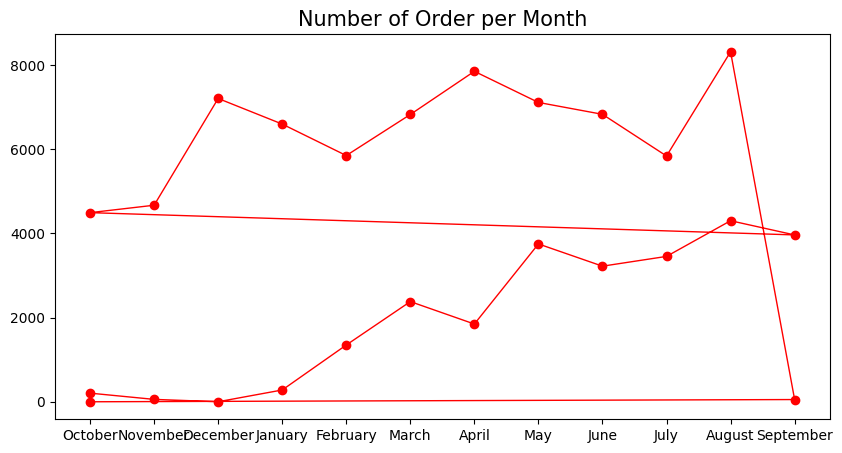

In [292]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df["order_delivered_customer_date"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=1,
    color="#FF0000"
)
plt.title("Number of Order per Month", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [294]:
monthly_orders_df.head()

,order_delivered_customer_date,order_count,revenue,most_ordered_category
0,October,208,30334.13,moveis_decoracao
1,November,60,9994.18,beleza_saude
2,December,4,758.86,informatica_acessorios
3,January,283,33599.12,moveis_decoracao
4,February,1351,198909.29,moveis_decoracao


<ipython-input-298-2511fdc11c3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="most_ordered_category", data=monthly_orders_df.head(5), palette=colors, ax=ax[0])
<ipython-input-298-2511fdc11c3b>:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x="revenue", y="most_ordered_category", data=monthly_orders_df.head(5), palette=colors, ax=ax[0])
<ipython-input-298-2511fdc11c3b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="most_ordered_category", data=monthly_orders_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
<ipython-input-298-2511fdc11c3b>:11: UserWarning: The

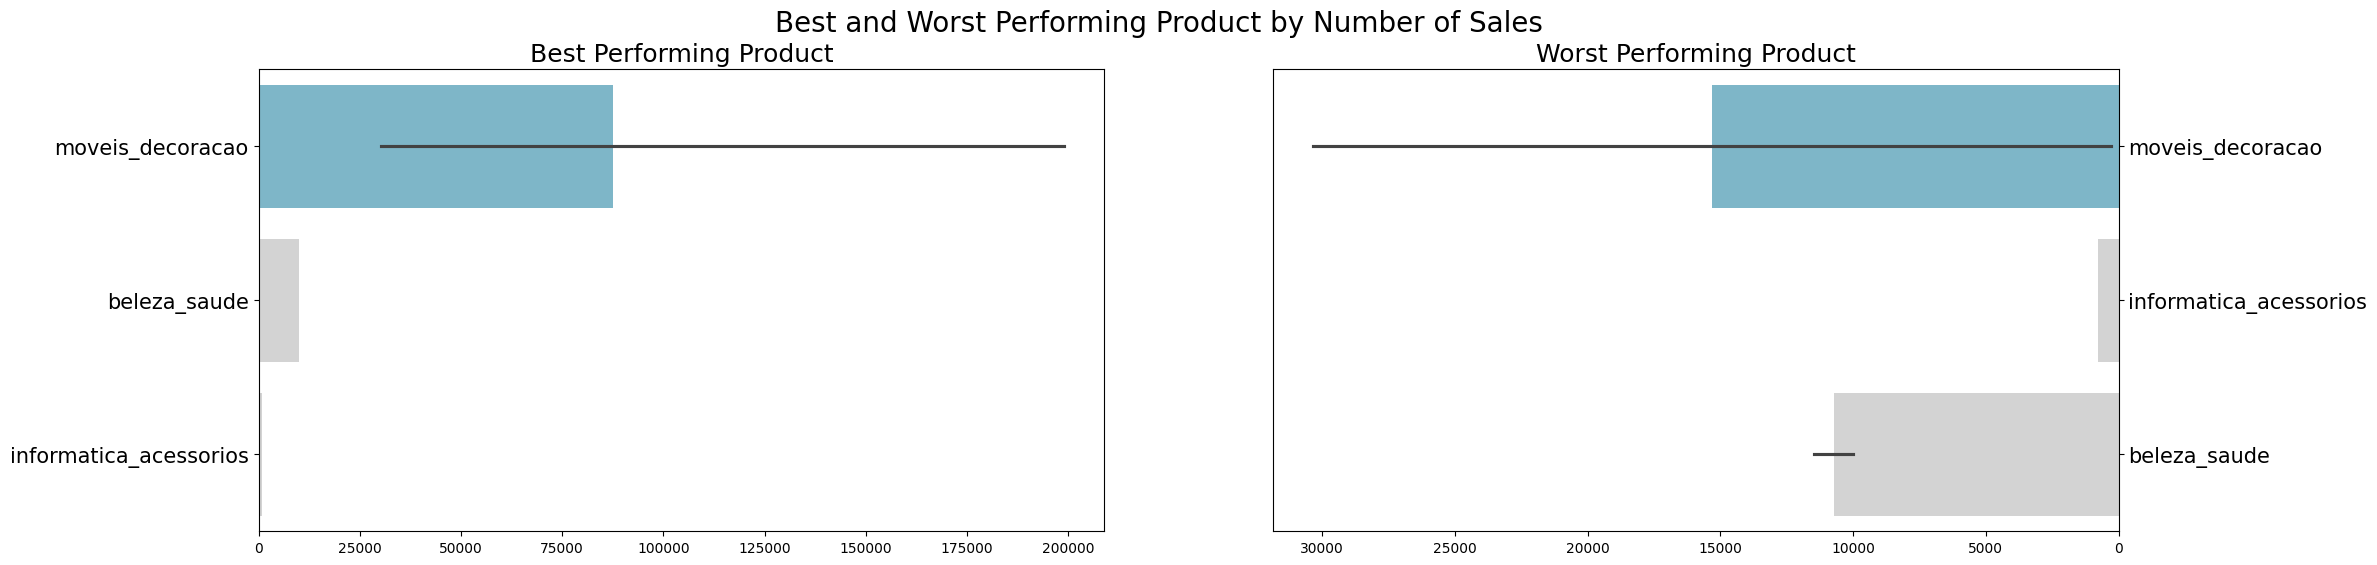

In [298]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="most_ordered_category", data=monthly_orders_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="revenue", y="most_ordered_category", data=monthly_orders_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

In [299]:
path = '/content/drive/MyDrive/Dataset'
customer_order_product_df.to_csv(path+"alldata.csv", index=None)